In [109]:
import numpy as np
import cv2
import vehicle_detection as vd
from scipy.ndimage.measurements import label
from keras.models import load_model
from sklearn.externals import joblib 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
import importlib
importlib.reload(vd) 


<module 'vehicle_detection' from '/home/yochanan/Downloads/Udacity/CarND-Vehicle-Detection-master/vehicle_detection_package/vehicle_detection.py'>

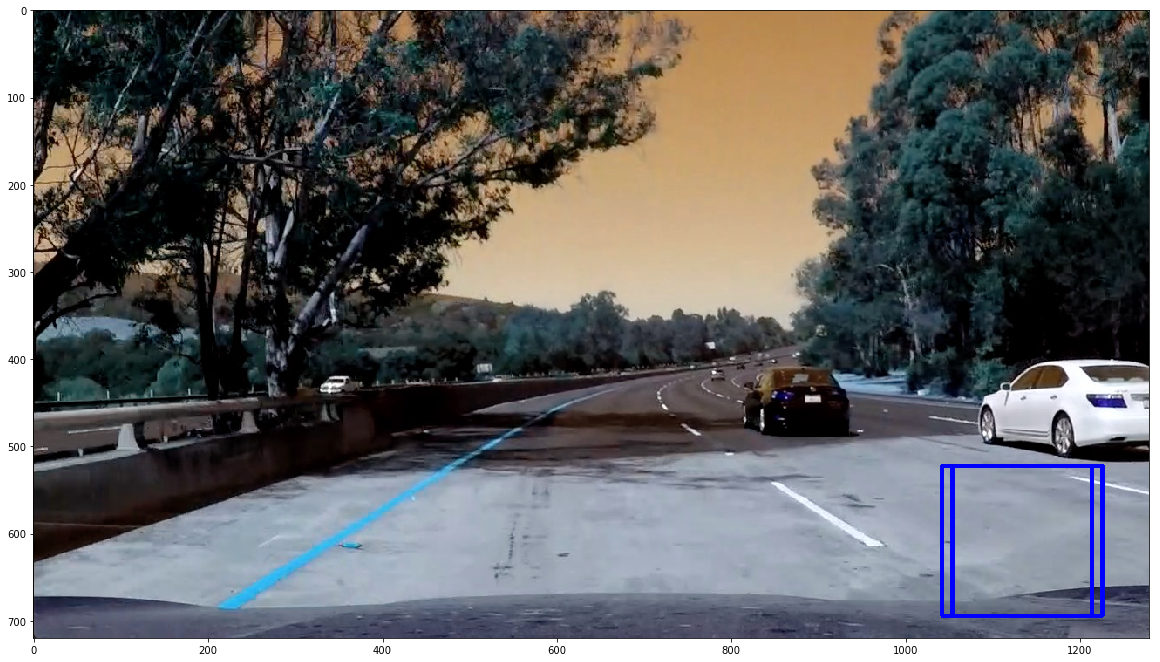

In [15]:
for window in windows[1300:1302]:
    new_image = cv2.rectangle(test_image, window[0],window[1], (0,0,255), 3)
plt.figure(figsize = (20,20))

plt.imshow(test_image)

In [72]:


model = load_model('model.h5')
model.load_weights('weights.h5')

# scaler_filename = "scaler.save"
# joblib.dump(scaler, scaler_filename) 

# And now to load...

scaler = joblib.load('scaler.pkl') 



In [100]:
windows = vd.slide_window()
print(len(windows))
test_image = cv2.cvtColor(cv2.imread('../test_images/test5.jpg'),cv2.COLOR_RGB2BGR)
bboxes = vd.search_windows(cv2.cvtColor(test_image,cv2.COLOR_RGB2BGR), windows, model, scaler)
heat = np.zeros_like(test_image[:,:,0]).astype(np.float)

1380


In [101]:
 
    # Add heat to each box in box list
heat = vd.add_heat(heat,bboxes)

# Apply threshold to help remove false positives
heat = vd.apply_threshold(heat, 3)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
image_copy = np.copy(test_image)
draw_img = vd.draw_labeled_bboxes(image_copy, labels)
draw_bboxes = vd.draw_labeled_bboxes(image_copy, bboxes)

TypeError: can only concatenate tuple (not "int") to tuple

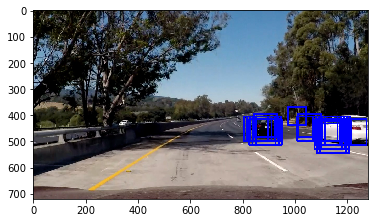

In [102]:
for bbox in bboxes:
    new_image = cv2.rectangle(test_image, bbox[0],bbox[1], (0,0,255), 6)
plt.imshow(new_image)
plt.savefig('bboxes.jpg')


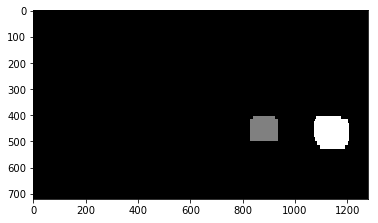

In [103]:
plt.imshow(labels[0], cmap='gray')
plt.savefig('heatmap.jpg')


1380


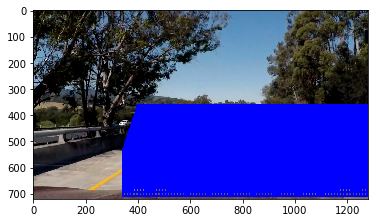

In [104]:
windows = vd.slide_window()
print(len(windows))

for window in windows:
    new_image = cv2.rectangle(test_image, window[0],window[1], (0,0,255), 6)
plt.imshow(new_image)
plt.savefig('all_windows.jpg')


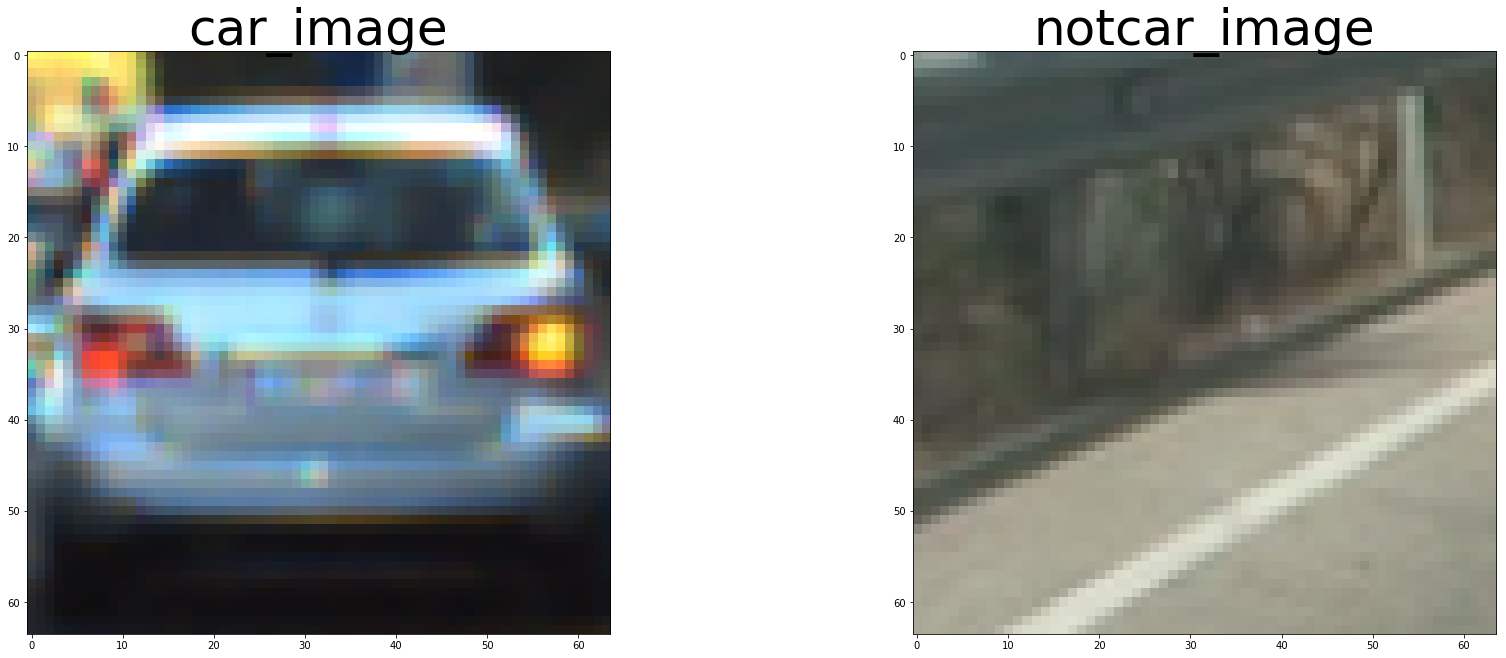

In [120]:
car_image = mpimg.imread('../vehicles/vehicles/KITTI_extracted/1010.png')
notcar_image = mpimg.imread('../non-vehicles/non-vehicles/GTI/image1000.png')
p = vd.plot_side_by_side([car_image, notcar_image], ["car_image", 'notcar_image'])
plt.savefig('car_noncar.jpg')
